# Gather

In [209]:
import requests
import pandas as pd
import numpy as np
import tweepy
import json
import matplotlib.pyplot as plt

In [2]:
#read in twitter archive csv file provided to us
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [31]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
# pull tsv file from udacity server to local machine 
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open("image_predictions.tsv", 'wb') as f:
    f.write(r.content)

In [5]:
# read in image predictions file
img_prd = pd.read_csv('image_predictions.tsv', sep='\t')
img_prd.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [6]:
img_prd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Query Twitter's API to get retweet and favorite counts

In [7]:
# set up authentication for tweepy api
consumer_key = 'pcS5hx0NE8mm9a3OzsmCQczrX'
consumer_secret = 'HsRh1G75LaBST5nAe9nMtHU1Hy2hLVoVDKLHGNbZAM5srQboCa'
access_token = '1050813299305172992-1Vo8Ki8SrgV2hs596RA1DSlz6uDk6H'
access_token_secret = 'z4RLx3D6WspQxMN1aiIs0DTgvTxRzWgIeP6qa6RDbEZV4'

auth = tweepy.auth.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [9]:
#this code will add available tweets to lines in the text file and the
#ones that error out will be recorded in a list
tweet_status = []
error_list = []

with open('tweet_json.txt', 'a', encoding='utf-8') as f:
    for tweet_id in archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            favorite_count = tweet['favorite_count']
            retweet_count = tweet['retweet_count']
            tweet_status.append({'tweet_id': int(tweet_id),
                                'favorite_count': int(favorite_count),
                                'retweet_count': int(retweet_count)})
        except:
            error_list.append(tweet_id)
            continue

Rate limit reached. Sleeping for: 637
Rate limit reached. Sleeping for: 647


In [11]:
print(error_list)
print(len(error_list))

[888202515573088257, 873697596434513921, 872668790621863937, 869988702071779329, 866816280283807744, 861769973181624320, 845459076796616705, 842892208864923648, 837012587749474308, 827228250799742977, 802247111496568832, 775096608509886464, 771004394259247104, 770743923962707968, 754011816964026368]
15


In [12]:
# create dataframe for the tweet information to reside
tweet_status = pd.DataFrame(tweet_status, columns=['tweet_id', 'favorite_count', 
                                                   'retweet_count'])
tweet_status.to_csv('tweet_json.txt', encoding='utf-8')

In [13]:
tweet_status = pd.read_csv('tweet_json.txt', encoding='utf-8')
tweet_status.head()

Unnamed: 0            tweet_id  favorite_count  retweet_count
0           0  892420643555336193           38317           8409
1           1  892177421306343426           32843           6199
2           2  891815181378084864           24740           4100
3           3  891689557279858688           41661           8528
4           4  891327558926688256           39830           9261

In [16]:
# drop the unnecessary column added with index values
tweet_status = tweet_status.drop('Unnamed: 0', axis=1)
tweet_status.head()

tweet_id  favorite_count  retweet_count
0  892420643555336193           38317           8409
1  892177421306343426           32843           6199
2  891815181378084864           24740           4100
3  891689557279858688           41661           8528
4  891327558926688256           39830           9261

In [18]:
all_info = pd.merge(archive, img_prd, on='tweet_id')
all_info = pd.merge(all_info, tweet_status, on='tweet_id')
all_info.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls      ...        p1_conf  \
0  https://twitter.com/dog_rates/status/892420643...      ...       0.097049   
1  https://twitter.com/dog_rates/status/892177421...      ...       0.323581   
2  https://twitter.com/dog_rates/status/891815181...      ...       0.716012   
3  https://twitter.com/dog_rates/status/891689557...      ...       0.170278   
4  https://twitter.com/dog_rates/status/891327558...      ...       0.555712   

   p1_dog                  p2   p2_conf p2_dog                           p3  \
0   False               bagel  0.085851  False                       banana   
1    True            Pekinese  0.090647   True                     papillon   
2    True            malamute  0.078253   True                       kelpie   
3   False  Labrador_retriever  0.168086   True                      spatula   
4    True    English_springer  0.225770   True  German_short-haired_pointer   

    p3_conf p3_dog  favorite_count retweet_count  
0  0.076110  False           38317          8409  
1  0.068957   True           32843          6199  
2  0.031379   True           24740          4100  
3  0.040836  False           41661          8528  
4  0.175219   True           39830          9261  

[5 rows x 30 columns]

# Assess

In [19]:
all_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 30 columns):
tweet_id                      2067 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null int64
rating_denominator            2067 non-null int64
name                          2067 non-null object
doggo                         2067 non-null object
floofer                       2067 non-null object
pupper                        2067 non-null object
puppo                         2067 non-null object
jpg_url                       2067 

In [20]:
all_info['in_reply_to_status_id'].value_counts()

6.671522e+17    2
8.558181e+17    1
6.753494e+17    1
6.747934e+17    1
6.747522e+17    1
7.468859e+17    1
6.706684e+17    1
6.844811e+17    1
6.749998e+17    1
6.842229e+17    1
7.291135e+17    1
6.754971e+17    1
6.717299e+17    1
7.590995e+17    1
6.914169e+17    1
6.920419e+17    1
6.715610e+17    1
7.030419e+17    1
6.757073e+17    1
7.032559e+17    1
6.678065e+17    1
7.331095e+17    1
Name: in_reply_to_status_id, dtype: int64

In [21]:
all_info['in_reply_to_user_id'].value_counts()

4.196984e+09    23
Name: in_reply_to_user_id, dtype: int64

There doesn't seem to be much value to these 2 columns as there are not very many rows that actually contains values. It will also not provide more insight into the twitter user's online presence.

In [30]:
all_info['name'].value_counts()

None          574
a              55
Tucker         10
Lucy           10
Cooper         10
Oliver         10
Charlie        10
Penny          10
Lola            8
Winston         8
Sadie           8
Bo              8
Toby            7
the             7
Daisy           7
an              7
Rusty           6
Dave            6
Scout           6
Stanley         6
Jax             6
Bailey          6
Milo            6
Bella           6
Koda            6
Buddy           5
Leo             5
Larry           5
Oscar           5
Alfie           5
             ... 
Tuck            1
Lucia           1
Kramer          1
Brandy          1
Bilbo           1
Jennifur        1
Hall            1
Milky           1
Kingsley        1
light           1
Ed              1
Charleson       1
Aubie           1
Fillup          1
Chesterson      1
Goose           1
Crouton         1
Logan           1
Glenn           1
Fizz            1
Eazy            1
Ralpher         1
Ralphson        1
Pete            1
Dudley    

In [26]:
all_info['doggo'].value_counts()

None     1987
doggo      80
Name: doggo, dtype: int64

In [27]:
all_info['floofer'].value_counts()

None       2059
floofer       8
Name: floofer, dtype: int64

In [28]:
all_info['pupper'].value_counts()

None      1846
pupper     221
Name: pupper, dtype: int64

In [29]:
all_info['puppo'].value_counts()

None     2043
puppo      24
Name: puppo, dtype: int64

In [32]:
all_info['rating_numerator'].value_counts()

12      472
10      429
11      413
13      280
9       151
8        95
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
0         2
80        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
143       1
420       1
1776      1
15        1
27        1
45        1
75        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

There's a huge outlier in the mix of the rating numerators. A value of 1776. The next highest value is 420. We will have to investigate this more later on to make sure this still fits into the data.

In [33]:
all_info['rating_denominator'].value_counts()

10     2049
50        3
11        2
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [34]:
all_info['text'].value_counts()

This is Daisy. She's puppears to be rare as all h*ck. Only seven like her currently domesticated. 13/10 pettable af https://t.co/meUc8jufAO                               1
Say hello to Brutus and Jersey. They think they're the same size. Best furiends furever. Both 11/10 would pet simultaneously https://t.co/rkhCFfDtxB                      1
Rare submerged pup here. Holds breath for a long time. Frowning because that spoon ignores him. 5/10 would still pet https://t.co/EJzzNHE8bE                              1
Meet Tassy &amp; Bee. Tassy is pretty chill, but Bee is convinced the Ruffles are haunted. 10/10 &amp; 11/10 respectively https://t.co/fgORpmTN9C                         1
RT @dog_rates: This is Loki. He smiles like Elvis. Ain't nothin but a hound doggo. 12/10 https://t.co/QV5nx6otZR                                                          1
This is Doug. He's a Draconian Jabbawockee. Rad tongue. Ears are borderline legendary 11/10 would pet with a purpose https://t.co/MVvbQW88Pv

In [39]:
all_info[all_info['retweet_count']==1]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, favorite_count, retweet_count]
Index: []

[0 rows x 30 columns]

In [40]:
all_info[all_info['retweet_count']==None]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, favorite_count, retweet_count]
Index: []

[0 rows x 30 columns]

In [59]:
all_info['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1954
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [61]:
all_info['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/712097430750289920/photo/1                                                                                                                                                                                                    1
https://twitter.com/dog_rates/status/684241637099323392/photo/1,https://twitter.com/dog_rates/status/684241637099323392/photo/1,https://twitter.com/dog_rates/status/684241637099323392/photo/1                                                                    1
https://twitter.com/dog_rates/status/703382836347330562/photo/1,https://twitter.com/dog_rates/status/703382836347330562/photo/1                                                                                                                                    1
https://twitter.com/dog_rates/status/689143371370250240/photo/1                                                                                                                                                          

## 8 Quality Issues:
1. There are multiple columns within the dataframe that have a ton of null values.
2. The name column says that all the rows have values in them, but when you take a closer look, there's 574 rows with "none" in them. It also contains values that aren't names, like the letter 'a' is listed as a name.
3. Both of the timestamp columns are listed as objects when they need to be in a datetime format.
4. Rows will need to be deleted if they are not original tweets. In other words, if the row is a retweet, it will need to be deleted.
5. The data size has decreased throughout the merging process. We started with the original archive dataset being 2356 rows, the image predictions dataframe only had 2075 rows and we ended up with 2067 rows after the merge. 
6. The four columns- doggo, floofer, pupper, and puppo- seem to not add any value to the dataset. There is also not many rows that actually have a value present for this column.
7. 15 of the twitter id's given to us were not found by the tweepy api.
8. We only want rows that have images attached to the tweets and need to remove rows that don't.

## 2 Tidiness Issues:
1. A lot of the columns don't contain useful information. There is also some duplication we ran into with merging the dataframes.
2. Data was in all sorts of different places, I needed to merge the data together. The columns could also be in a different order, where it would be easier to interpret.

# Clean

In [58]:
# drop unnecessary columns that don't add value to the investigation
all_info = all_info.drop(['floofer', 'doggo', 'pupper', 'puppo', 'in_reply_to_status_id', 
                          'in_reply_to_user_id', 'expanded_urls', 'source', 'retweeted_status_id', 
                          'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [46]:
# change column values to correct data type
all_info['timestamp'] = pd.to_datetime(all_info['timestamp'])
all_info['retweeted_status_timestamp'] = pd.to_datetime(all_info['retweeted_status_timestamp'])

In [89]:
all_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2066
Data columns (total 19 columns):
tweet_id              1993 non-null int64
timestamp             1993 non-null datetime64[ns]
text                  1993 non-null object
rating_numerator      1993 non-null int64
rating_denominator    1993 non-null int64
name                  1993 non-null object
jpg_url               1993 non-null object
img_num               1993 non-null int64
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null bool
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null bool
p3                    1993 non-null object
p3_conf               1993 non-null float64
p3_dog                1993 non-null bool
favorite_count        1993 non-null int64
retweet_count         1993 non-null int64
dtypes: bool(3), datetime64[ns](1), float64(3), int64(6), object(6)
memory us

In [56]:
# drop rows that contain the retweeted information
print(len(all_info['retweeted_status_id']))

all_info = all_info[pd.isnull(all_info['retweeted_status_id'])]

print(len(all_info['retweeted_status_id']))

1993
1993


In [65]:
# check to see all the tweets have images attached to them
len(all_info['jpg_url'])

1993

Looks like all of the remaining tweets have images attached so we shouldn't need to do any row removing for this quality issue.

In [69]:
list(all_info['name'].values)

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'a',
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Emmy',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'Cash',
 'Jed',
 'None',
 'Sebastian',
 'None',
 'Sierra',
 'None',
 'None',
 'Monkey',
 'None',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Boomer',
 'None',
 'Cody',
 'Zoey',
 'Rumble',
 'Clifford',
 'Dewey',
 'Stanley',
 'Scout',
 'Gizmo',

In [82]:
# Replace mis-typed or fake names with None
all_info['name'].replace('the', 'None', inplace=True)
all_info['name'].replace('his', 'None', inplace=True)
all_info['name'].replace("not",'None', inplace=True)
all_info['name'].replace("one",'None', inplace=True)
all_info['name'].replace("my",'None', inplace=True)
all_info['name'].replace("O","None", inplace=True)
all_info['name'].replace("quite","None", inplace=True)
all_info['name'].replace("such","None", inplace=True)
all_info['name'].replace("a",'None', inplace=True)
all_info['name'].replace("an",'None', inplace=True)
all_info['name'].replace("just",'None', inplace=True)
all_info['name'].replace("getting",'None', inplace=True)
all_info['name'].replace("unacceptable",'None', inplace=True)
all_info['name'].replace("infuriating",'None', inplace=True)
all_info['name'].replace("light",'None', inplace=True)
all_info['name'].replace("by",'None', inplace=True)
all_info['name'].replace("actually",'None', inplace=True)
all_info['name'].replace("all",'None', inplace=True) 
all_info['name'].replace("this",'None', inplace=True) 
all_info['name'].replace("very",'None', inplace=True) 

In [91]:
# tranform numerator and denominator columns to float data types
all_info['rating_numerator'] = all_info['rating_numerator'].astype(float)
all_info['rating_denominator'] = all_info['rating_denominator'].astype(float)

In [92]:
all_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2066
Data columns (total 19 columns):
tweet_id              1993 non-null int64
timestamp             1993 non-null datetime64[ns]
text                  1993 non-null object
rating_numerator      1993 non-null float64
rating_denominator    1993 non-null float64
name                  1993 non-null object
jpg_url               1993 non-null object
img_num               1993 non-null int64
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null bool
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null bool
p3                    1993 non-null object
p3_conf               1993 non-null float64
p3_dog                1993 non-null bool
favorite_count        1993 non-null int64
retweet_count         1993 non-null int64
dtypes: bool(3), datetime64[ns](1), float64(5), int64(4), object(6)
memor

In [101]:
all_info[all_info['rating_numerator']==1776].index

Int64Index([796], dtype='int64')

At first glance, this looks like it might be a fake tweet. The image prediction says bow_tie as what type of dog they guess it is. Let's follow the jpg url and see what we find.

After following the url, we see that it truly is a dog all decked out in American apparel, who also happens to have a big festive bow-tie around his neck.

In [174]:
#create overall rating column by dividing numerator by denominator column
all_info['overall_rating'] = all_info['rating_numerator'] / all_info['rating_denominator']
all_info.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...              13.0   
1  This is Tilly. She's just checking pup on you....              13.0   
2  This is Archie. He is a rare Norwegian Pouncin...              12.0   
3  This is Darla. She commenced a snooze mid meal...              13.0   
4  This is Franklin. He would like you to stop ca...              12.0   

   rating_denominator      name  \
0                10.0   Phineas   
1                10.0     Tilly   
2                10.0    Archie   
3                10.0     Darla   
4                10.0  Franklin   

                                           jpg_url  img_num           p1  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1       orange   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1    Chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1    Chihuahua   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1  paper_towel   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2       basset   

    p1_conf  p1_dog                  p2   p2_conf  p2_dog  \
0  0.097049   False               bagel  0.085851   False   
1  0.323581    True            Pekinese  0.090647    True   
2  0.716012    True            malamute  0.078253    True   
3  0.170278   False  Labrador_retriever  0.168086    True   
4  0.555712    True    English_springer  0.225770    True   

                            p3   p3_conf  p3_dog  favorite_count  \
0                       banana  0.076110   False           38317   
1                     papillon  0.068957    True           32843   
2                       kelpie  0.031379    True           24740   
3                      spatula  0.040836   False           41661   
4  German_short-haired_pointer  0.175219    True           39830   

   retweet_count  overall_rating  
0           8409             1.3  
1           6199             1.3  
2           4100             1.2  
3           8528             1.3  
4           9261             1.2

In [199]:
#create a column that will store all the correctly identified dog breeds
#create empty columns for the values to flow into
predicted_breed = []
predicted_confidence = []

#create logic to fill the columns when prediction was TRUE
def extract_breed(all_info):
    if all_info['p1_dog'] == True:
        predicted_breed.append(all_info['p1'])
        predicted_confidence.append(all_info['p1_conf'])
    elif all_info['p2_dog'] == True:
        predicted_breed.append(all_info['p2'])
        predicted_confidence.append(all_info['p2_conf'])
    elif all_info['p3_dog'] == True:
        predicted_breed.append(all_info['p3'])
        predicted_confidence.append(all_info['p3_conf'])
    else:
        predicted_breed.append('Incorrect')
        predicted_confidence.append('Incorrect')

all_info.apply(extract_breed, axis=1)
all_info['predicted_breed'] = predicted_breed
all_info['predicted_confidence'] = predicted_confidence
all_info.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...              13.0   
1  This is Tilly. She's just checking pup on you....              13.0   
2  This is Archie. He is a rare Norwegian Pouncin...              12.0   
3  This is Darla. She commenced a snooze mid meal...              13.0   
4  This is Franklin. He would like you to stop ca...              12.0   

   rating_denominator      name  \
0                10.0   Phineas   
1                10.0     Tilly   
2                10.0    Archie   
3                10.0     Darla   
4                10.0  Franklin   

                                           jpg_url  img_num           p1  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1       orange   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1    Chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1    Chihuahua   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1  paper_towel   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2       basset   

    p1_conf         ...          p2_dog                           p3  \
0  0.097049         ...           False                       banana   
1  0.323581         ...            True                     papillon   
2  0.716012         ...            True                       kelpie   
3  0.170278         ...            True                      spatula   
4  0.555712         ...            True  German_short-haired_pointer   

    p3_conf  p3_dog favorite_count  retweet_count  overall_rating  dog_breed  \
0  0.076110   False          38317           8409             1.3        NaN   
1  0.068957    True          32843           6199             1.3        NaN   
2  0.031379    True          24740           4100             1.2        NaN   
3  0.040836   False          41661           8528             1.3        NaN   
4  0.175219    True          39830           9261             1.2        NaN   

   predicted_confidence     predicted_breed  
0             Incorrect           Incorrect  
1              0.323581           Chihuahua  
2              0.716012           Chihuahua  
3              0.168086  Labrador_retriever  
4              0.555712              basset  

[5 rows x 23 columns]

In [200]:
#remove rows that the algorithm did not predict correctly
all_info = all_info[all_info['predicted_breed'] != "Incorrect"]

## Store

In [153]:
all_info.to_csv('twitter_archive_master.csv', header=True, encoding = 'utf-8')

## 3 Insights and 1 Visualization

### What are the top 5 most popular dog names?

In [201]:
all_info['name'].value_counts()[:6]

None       497
Lucy        10
Cooper      10
Charlie      9
Oliver       9
Tucker       9
Name: name, dtype: int64

Looks like Charlie, Cooper, Oliver, Lucy and Tucker are the most popular dog names in this dataset, in respective order.

Text(0,0.5,'Name')

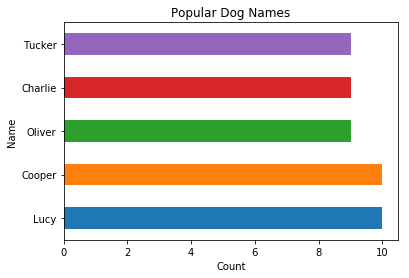

In [210]:
dog_names = all_info.groupby('name').filter(lambda x: len(x) >= 9)

dog_names['name'].value_counts()[1:].plot(kind = 'barh')
plt.title('Popular Dog Names')
plt.xlabel('Count')
plt.ylabel('Name')

### What is the top 5 most popular dog breeds that were predicted correctly?

In [231]:
popular_breeds = all_info['predicted_breed'].value_counts()[:10]
popular_breeds

golden_retriever      158
Labrador_retriever    108
Pembroke               95
Chihuahua              91
pug                    62
toy_poodle             51
chow                   48
Pomeranian             42
Samoyed                42
malamute               33
Name: predicted_breed, dtype: int64

Text(0,0.5,'Count')

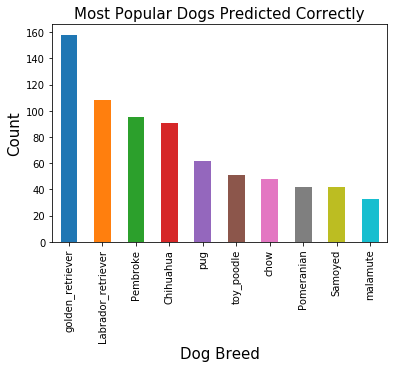

In [232]:
popular_breeds.plot(kind='bar')
plt.title('Most Popular Dogs Predicted Correctly', fontsize=15)
plt.xlabel('Dog Breed', fontsize=15)
plt.ylabel('Count', fontsize=15)

The top 5 most popular dog breed that were correctly predicted are golden retrievers, labrador retrievers, pembrokes, chihuahuas, and pugs for this dataset, in their respective orders.

### What dog breeds have the highest average ratings?

In [282]:
all_info.groupby(['predicted_breed'])['overall_rating'].describe().sort_values('max', ascending=False)[:5]

count      mean       std  min    25%  50%  75%       max
predicted_breed                                                            
Pomeranian         42.0  1.247619  0.997861  0.6  1.000  1.1  1.2  7.500000
golden_retriever  158.0  1.166752  0.224142  0.5  1.100  1.2  1.2  3.428571
clumber             1.0  2.700000       NaN  2.7  2.700  2.7  2.7  2.700000
kuvasz             18.0  1.161111  0.421676  0.4  1.025  1.2  1.2  2.600000
Eskimo_dog         22.0  1.140909  0.140269  0.9  1.000  1.2  1.2  1.400000

The top 5 best rating dog breeds ended up being pomeranian, golden retriever, clumber, kuvasz, and eskimo dog. I find this very interesting because these are not extremely common dog breeds. I thought I might find the more common dog breeds that had the highest ratings.

### Which dog breeds have the most retweets?

In [277]:
breed_retweet_grp = all_info.groupby(['predicted_breed']).sum()['retweet_count'].sort_values(ascending=False)[:10]
breed_retweet_grp

predicted_breed
golden_retriever      565340.0
Labrador_retriever    396466.0
Pembroke              280627.0
Chihuahua             249500.0
Samoyed               192982.0
French_bulldog        156481.0
cocker_spaniel        141332.0
chow                  127669.0
pug                   112894.0
toy_poodle            110440.0
Name: retweet_count, dtype: float64

Text(0,0.5,'Number of Retweets')

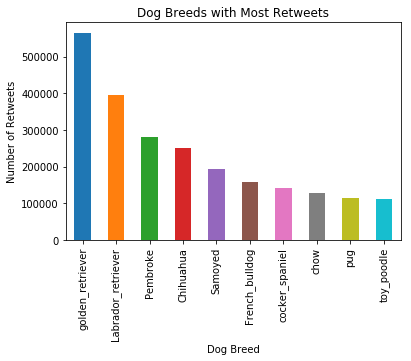

In [280]:
breed_retweet_grp.plot(kind='bar')
plt.title('Dog Breeds with Most Retweets')
plt.xlabel("Dog Breed")
plt.ylabel("Number of Retweets")
# labels = all_info.groupby(['predicted_breed']).sum()['retweet_count'].sort_values(ascending=False)[:10].index
# plt.xticks(rotation='vertical')
# plt.xticks([0,1,2,3,4,5,6,7,8,9], ['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua', 'Samoyed', 'French_bulldog', 'cocker_spaniel', 'chow', 'pug', 'toy_poodle'])